# Programación *iterativa* y *recursiva*


En programación, **recursión** y **iteración** son dos estilos para construir soluciones repetitivas:

- **Recursiva**: una función se llama a sí misma sobre subproblemas más pequeños hasta llegar a un *caso base*.
  - *Ventajas*: código muy claro para estructuras autorreferenciales.
  - *Desventajas*: sobrecosto de llamadas, puede repetir trabajo y ser exponencial si no se memorizan resultados.

- **Iterativa**: se usa un bucle (`for`/`while`) que actualiza variables paso a paso.
  - *Ventajas*: suele ser más eficiente en tiempo y memoria; control explícito de paradas; evita límite de recursión.
  - *Desventajas*: a veces el código es menos directo o elegante que su versión recursiva.

En problemas de **sucesiones** definidas recursivamente (por ejemplo, $a_{n+1}=f(a_n)$), el enfoque iterativo es natural; sin embargo, la recursión permite expresar algunos procesos de manera muy compacta (por ejemplo, la sucesión de Fibonacci).

## Ejemplo: Sucesión de Fibonacci
La sucesión de Fibonacci $F_n$ está dada por $F_0=0$, $F_1=1$ y $F_{n+1}=F_n+F_{n-1}$.

###  Implementación recursiva (ingenua)
La versión recursiva directa recalcula muchos subproblemas y su complejidad es exponencial.

In [16]:
def fibonacci_recursivo(n: int) -> int:
    """Versión recursiva ingenua de Fibonacci.
    PRE: n >= 0.
    """
    if n < 0:
        raise ValueError("n debe ser no negativo")
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fibonacci_recursivo(n-1) + fibonacci_recursivo(n-2)

In [5]:
fibonacci_recursivo(3)  # 55

2

## Implementación iterativa
La versión iterativa hace una sola pasada.

In [ ]:
def fibonacci_iterativo(n: int) -> int:
    """Versión iterativa de Fibonacci."""
    if n < 0:
        raise ValueError("n debe ser no negativo")
    f0 = 0
    f1 = 1
    lista = [f0,f1]
    if n == 0:
        return 0
    for _ in range(n-1):
        f = lista[-1]+lista[-2]
        lista.append(f)
    return lista[-1]

In [14]:
fibonacci_iterativo(1)

1

In [ ]:
def lista_fibonacci(n: int) -> list:
    """Devuelve [F_0, ..., F_n]."""
    return [fibonacci_iterativo(k) for k in range(n+1)]


In [19]:
fibonacci_iterativo(50)

12586269025

### Comparación empírica simple
Medimos tiempos para $n=30$ (recursivo ingenuo vs. iterativo).

In [20]:
import time

def medir_tiempo(func, *args):
    t0 = time.perf_counter()
    res = func(*args)
    t1 = time.perf_counter()
    return res, (t1 - t0)

n_prueba = 35
res1, t1 = medir_tiempo(fibonacci_recursivo, n_prueba)
res3, t3 = medir_tiempo(fibonacci_iterativo, n_prueba)

print(f"F_{n_prueba} = {res3}")
print("Recursivo ingenuo:   {:.4f} s".format(t1))
print("Iterativo:            {:.6f} s".format(t3))


F_35 = 9227465
Recursivo ingenuo:   3.0456 s
Iterativo:            0.000009 s


## Herramientas generales para sucesiones
Usaremos un *criterio numérico de convergencia*: detener cuando $|x_{n+1}-x_n|<\text{tolerancia}$, y siempre con un **máximo de iteraciones** para evitar bucles infinitos si la sucesión no converge (o converge muy lentamente). También permitiremos un *criterio objetivo* opcional, por ejemplo, detener cuando $|x_n - L|<\text{tolerancia}$ para un límite esperado $L$.

In [12]:

import numpy as np
import matplotlib.pyplot as plt

def iterar_hasta_convergencia(
    f,
    x0: float,
    tolerancia: float = 1e-8,
    max_iter: int = 1000
) -> list[float]:
    """
    Itera x_{n+1} = f(n, x_n) desde x0 y devuelve (trayectoria, n_convergencia).
    """
    xs = [x0]
    x = x0
    for n in range(max_iter):
        xn1 = f(n, x)
        xs.append(xn1)
        if abs(xn1 - x) < tolerancia:
            return xs, n+1
        x = xn1
    return xs, None

def graficar_sucesion(valores: list[float], titulo: str = "Sucesión") -> None:
    """Grafica los términos de una sucesión. No fija estilos ni colores específicos."""
    plt.figure()
    plt.plot(range(len(valores)), valores, marker='o')
    plt.title(titulo)
    plt.xlabel('n')
    plt.ylabel('a_n')
    plt.grid(True)
    plt.show()

##  Ejercicio 1

Usa las siguientes sucesiones definidas recursivamente:

a) $x_1=1$ y $x_{n+1}=3x_n+1$.

b) $y_1=2$ y $y_{n+1}=\tfrac{1}{2}\big(y_n+\tfrac{2}{y_n}\big)$.

c) $z_1=1$, $z_2=2$ y $z_{n+2}=\dfrac{z_{n+1}+z_n}{\,z_{n+1}-z_n\,}$.


1) Programa cada sucesión (iterativamente) y lista sus primeros 100 términos.

2) Grafica los 100 términos de cada sucesión.

In [21]:
def suc_a(x1=1,n=100):
    """
    n es el numero de iteraciones que quiero de la sucesion
    """
    lista = [x1]
    for _ in range(n-1):
        lista.append(3*lista[-1]+1)
    return lista 

Text(0, 0.5, '$x_n$')

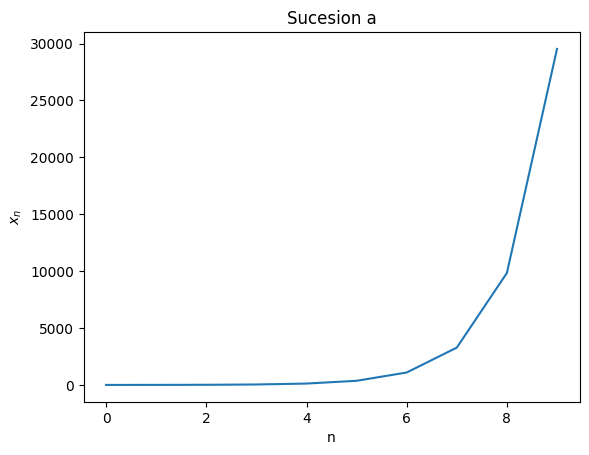

In [25]:
import matplotlib.pyplot as plt

plt.plot(suc_a(1,10))
plt.title("Sucesion a")
plt.xlabel("n")
plt.ylabel("$x_n$")

## Ejercicio 2

Verifique que:

a) $\displaystyle \lim_{n\to\infty} \sqrt[n]{n+1} = 1$.

b) $\displaystyle \lim_{n\to\infty} \sqrt[n]{a^n + b^n} = max\{a,b\}$.

Implemente numéricamente ambas expresiones y **detenga** cuando el valor estimado cumpla el criterio de tolerancia (`tolerancia`) o cuando alcance `max_iter`. Reporte el número de iteraciones usadas.

##  Ejercicio 3

Sea $(a_n)$ la sucesión de Fibonacci. Verifique que $\dfrac{a_{n+1}}{a_n}$ **converge al número áureo** $\varphi=\tfrac{1+\sqrt{5}}{2}$.

Implemente $\dfrac{a_{n+1}}{a_n}$ y detenga cuando $\big|\dfrac{a_{n+1}}{a_n}-\varphi\big|<\text{tolerancia}$ (criterio *objetivo* con $\varphi$) o al llegar a `max_iter`. Sugerencia: inicie en $a_1=1,a_2=1$ y evite división entre cero.

## Ejercicio 4

 Sea $a_1\in(0,1)$ y $a_{n+1}=a_n(1-a_n)$. Queremos ver que **$(n\,a_n)$ converge a $1$**.

Implemente la sucesión y grafique: (i) $a_n$ y (ii) $n\,a_n$. Use tolerancia para el *objetivo* $|n\,a_n-1|<\text{tol}$ y un `max_iter` para controlar el proceso.

## Ejercicio 5

Sea $a_1=2$ y $a_{n+1}=\dfrac{1}{2}\Big(a_n+\dfrac{2}{a_n}\Big)$. Verifica que $(a_n)$ es *decreciente* y *acotada inferiormente* por $\sqrt{2}$; más aún, la sucesión **converge a $\sqrt{2}$**. *Modifique* esta construcción para obtener una sucesión que converge a $\sqrt{c}$.

Implemente la iteración de Newton para $\sqrt{2}$ y su versión general para $\sqrt{c}$. Use `tolerancia` y `max_iter`.

## Ejercicio 6

Defina recursivamente $a_1=\tfrac{3}{2}$ y $a_{n+1}=\sqrt{3a_n-2}$. Verifique que $(a_n)$ **converge** y **calcule su límite**.

*(Nota: el criterio numérico debe detener por diferencia consecutiva o por `max_iter`.)*

## Ejercicio 7

Defina $a_1=1$ y $a_{n+1}=\sqrt{1+a_n}$. Verifique que $(a_n)$ **converge** y **calcule su límite**.

Implemente la sucesión con tolerancia y máximo de iteraciones; grafique los primeros términos junto con el valor aproximado del límite.

In [41]:
import numpy as np
def suc_7(tol,num_max):
    a1=1
    lista = [a1]
    for i in range(num_max):
        an = np.sqrt(1+lista[-1])
        lista.append(an)
        if abs(lista[-1]-lista[-2])<tol:
            return lista[-1], i , lista
    return lista[-1] , "no converge"

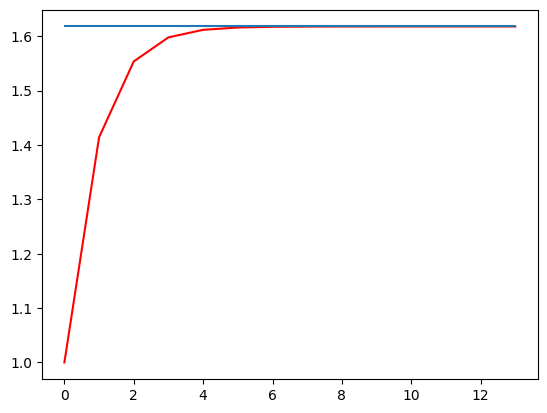

In [46]:
l = suc_7(0.000001,1000)[0]

plt.plot(suc_7(0.000001,1000)[2], color = "red")
plt.hlines(l,0,13)